In [9]:
from datasets import load_dataset
dataset = load_dataset('csv', data_files='D:/研究数据/科学解释研究/pythonProject/bert情感分析/rawdata.csv', split='train')
dataset

Dataset({
    features: ['label', 'text'],
    num_rows: 1084
})

In [10]:
dataset[0]

{'label': 3, 'text': '风可以加快水的蒸发，升温可以加快水的蒸发'}

In [11]:
dataset = dataset.shuffle(seed=42)
dataset[:10]

{'label': [1, 1, 2, 4, 1, 1, 1, 2, 2, 1],
 'text': ['因为吹风机吹热量把头发吹干',
  '加快了头发表面的空气流动，使表面的水分干的快。',
  '红汤上方有油封住，使汤底的热量难以散失，红汤升温快，先沸腾。',
  '子弹与飞行员是以相同速度，相同方向运动的，两者是相对静止的状态所以飞行员能徒手抓住子弹。',
  '使热水变冷，使冷水变热，分子做无规则运动，分子之间有间隙',
  '水汽化',
  '物理现象，水遇热蒸发',
  '小红在吹头发时，吹风机吹出的空气可以把头发上的水蒸发',
  '红汤一侧有一层油，油的比热容比水小，所以红汤一侧升温快，先沸腾。',
  '分子之间不断运动且热传递将热水传入冷水中']}

In [13]:
dataset.train_test_split(test_size=0.25)

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 813
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 271
    })
})

In [1]:
import pandas as pd

df = pd.read_csv('rawdata.csv')
df.head()

,label,text
0,3,风可以加快水的蒸发，升温可以加快水的蒸发
1,3,头发上水蒸发吸热所以感觉冷，吹风机吹风加快空气流动，加快蒸发，风是暖的，水受热温度上升，蒸发...
2,1,头发里水分的汽化吸热，会感觉到冷，吹风机里温暖的空气，补充汽化所散失的热量，且吹风机下流动快。
3,3,水分温度升高，空气流动加快，加快了水的蒸发
4,1,空气吹风使周围空气流速大，且周围空气温度升高，所以头发吹干


In [6]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

# 步骤1: 读取CSV文件
def load_data(csv_file):
    return pd.read_csv(csv_file)

# 步骤2: 创建自定义Dataset
class TextDataset(Dataset):
    def __init__(self, dataframe, text_col, label_col):
        self.dataframe = dataframe
        self.text_col = text_col
        self.label_col = label_col

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        text = self.dataframe.iloc[idx, self.dataframe.columns.get_loc(self.text_col)]
        label = self.dataframe.iloc[idx, self.dataframe.columns.get_loc(self.label_col)]
        return text, label

# 步骤3: 创建DataLoader
def get_dataloader(dataframe, text_col, label_col, batch_size=32):
    dataset = TextDataset(dataframe, text_col, label_col)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 使用示例
csv_file = 'rawdata.csv'  # 替换为你的CSV文件路径
text_col = 'text'  # 替换为你的文本列名
label_col = 'label'  # 替换为你的标签列名

# 读取数据
dataframe = load_data(csv_file)

# 获取数据加载器
dataloader = get_dataloader(dataframe, text_col, label_col, batch_size=32)

for i, (texts, labels) in enumerate(dataloader):
    print(f"批次 {i+1}:")
    print("文本样本:", texts)
    print("标签样本:", labels)
    if i == 0:  # 只打印第一个批次的样本
        break

批次 1:
文本样本: ('热水中的热分子与冷水中的冷分子结合后发生热传递。', '能量总是会从能量高的地方流动到能量低的地方，热量高的热水与热量低的冷水混合，使热量从热水到冷水中，从而形成温水。', '头发上面有小水珠，遇到热空气，蒸发成水蒸气。', '热水的温度高于冷水，热量会被传递给冷水，使其温度升高，最终达到一个平衡的状态。', '分子在做永不停息的无规则运动', '油层可以减少热量散失且油沸点高于水。', '子弹与空气处于相对静止的状态所以能抓住。', '飞机飞行速度和子弹飞行速度一样。', '溶解', '水分子扩散。', '因为红汤的一侧有油，油的比热容要小于水的比热容，所以相同时间内，吸收相同的热量，油升高的温度要大于水的温度，且油的沸点比水小，所以总是红一侧先沸腾。', '当子弹与飞行员速度相同时，子弹与飞行员相对静止，所以飞行员可以抓住子弹。', '红汤中有油，油与水的沸点不同。', '提高温度，加大空气流速使蒸发变快，水分汽化成了水蒸气。', '热水和冷水混合，热水放出热量，直到它们温度相同', '因为红汤的沸点低，到达沸点所以吸收的热量少于清汤，所以红汤先沸腾。', '子弹相对于飞机静止，飞机的速度与子弹相等。', '子弹和飞行员的速度大小差不多，所以相对静止，所以能抓住。', '油的沸点低。沸腾现象', 'v机=v弹', '以飞机为参照物子弹是静止不要，这是因为物体的相对静止。', '油的沸点低', '温度由温度高的传向低的，热水遇冷水，内能减少，温度降低，冷水遇热水，内能增多，温度升高', '冰糖在水中溶解了', '这是物体发生了热传递。热通常由高温物体传向低温物体，所以当热水与冷水混合后，热水与冷水之间发生了热传递，变成了温水。', '两种水温不同，放在一起自然会上升或下降，冷水把热水的温度降低，自然而然冷水的温度也上升了些。两种水温都降低了和升高了对方的温度。', '水蒸发吸热，温暖的空气为其蒸发提供了更多热量，空气流动加大了空气与水的接触。', '热传递使热水中的热量向冷水中传递使水升温', '发生了热传递，热水的内能减少', '飞机的速度与子弹差不多，两者相对静止', '在高空中，空气流速会变得慢一些，使子弹出现“小飞虫”的假想。', '吹风机吹出的温暖空气使头发上的水发生汽化。刚洗完头感到冷是因为水汽化吸热。')
标签样本: te

In [2]:
df['char_count'] = df['text'].apply(len)

In [3]:
df['char_count'].describe()

count    1084.000000
mean       27.145756
std        18.506144
min         2.000000
25%        12.000000
50%        24.000000
75%        38.000000
max       177.000000
Name: char_count, dtype: float64

In [4]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce88da4be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce88dc4160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce88d94820>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce88dc46a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce88dc4940>],
 'means': []}

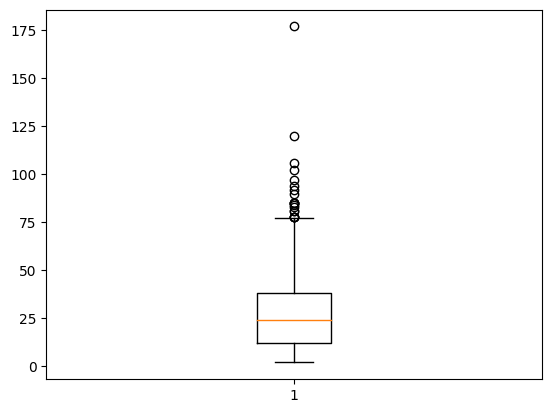

In [5]:
plt.boxplot(df['char_count'])

(array([434., 357., 213.,  55.,  17.,   6.,   1.,   0.,   0.,   1.]),
 array([  2. ,  19.5,  37. ,  54.5,  72. ,  89.5, 107. , 124.5, 142. ,
        159.5, 177. ]),
 <BarContainer object of 10 artists>)

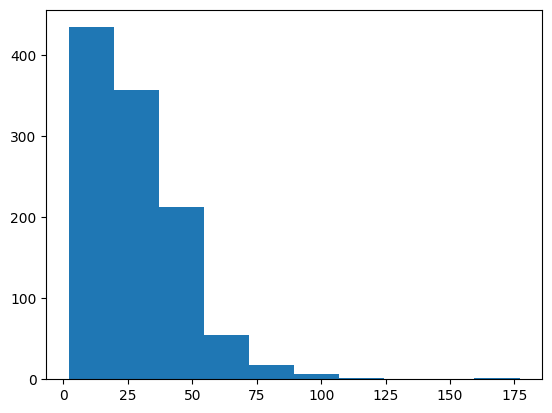

In [6]:
plt.hist(df['char_count'])

In [8]:
plt.bar(df['label'], height)

TypeError: bar() missing 1 required positional argument: 'height'

In [10]:
df['label'].value_counts()

label
1    357
2    313
0    188
3    163
4     63
Name: count, dtype: int64